### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the JoHn Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://covid19.ncdc.gov.ng/'
response = requests.get(url)
print(response.status_code)

200


In [3]:
soup = BeautifulSoup(response.text,"html.parser")

In [4]:
table = soup.findAll('table',{"id":"custom1"})[0]
values =[]

In [5]:
tr = table.findAll(['tr'])

In [6]:
csvFile = open("covidnig.csv",'wt',newline='',encoding='utf-8')
writer = csv.writer(csvFile)  
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      
        
finally:   
    csvFile.close()

In [7]:
# Save the data to a DataFrame object.
dfnig = pd.read_csv('covidnig.csv')

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [8]:
#[Write Your Code Here]
#df1
confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed_global = pd.read_csv(confirmed_global)

#df2
recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered_global = pd.read_csv(recovered_global)

#df3
deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths_global = pd.read_csv(deaths_global)

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [9]:
#[Write Your Code Here]
df_external = pd.read_csv('covid_external.csv')

In [10]:
df_budget = pd.read_csv('Budget data.csv')

In [11]:
df_readgdp = pd.read_csv('RealGDP.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [12]:
#[Write Your Code Here]
dfnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [13]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [14]:
df_confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644


In [15]:
df_recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38141,38200,38250,38252,38336,38475,38505,38540,38613,39006
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,24136,24520,24820,24820,25876,26381,26898,27426,27831,28121
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,59590,60028,60457,60888,61307,61700,62089,62487,62869,63260
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6598,6629,6629,6706,6706,6819,6875,6919,6963,6997
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8798,8841,8898,8924,8990,9194,9266,9345,9518,9592


In [16]:
df_deaths_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1945,1956,1965,1969,1995,2011,2025,2030,2047,2067
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,977,989,1003,1016,1028,1040,1055,1066,1074,1088
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2575,2584,2596,2609,2623,2631,2640,2647,2659,2666
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,78,78,79,79,79,79,79,80,80,81
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,365,366,371,372,372,379,382,384,386,387


In [17]:
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [18]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [19]:
#[Write Your Code Here]
dfnig.columns = ['states', 'cases_lab_confirmed', 'cases_on_admission', 'discharged', 'deaths']

In [20]:
dfnig = dfnig.replace(',','', regex=True)
a = dfnig[['cases_lab_confirmed', 'cases_on_admission', 'discharged']].columns
dfnig[a] = dfnig[a].apply(pd.to_numeric,errors='coerce')

In [21]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   cases_lab_confirmed  37 non-null     int64 
 2   cases_on_admission   37 non-null     int64 
 3   discharged           37 non-null     int64 
 4   deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [22]:
df_confirmed_global = df_confirmed_global.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [23]:
confirmed_nig = df_confirmed_global.groupby('Country/Region').sum().loc['Nigeria']

In [24]:
confirmed_nig = confirmed_nig.to_frame().reset_index()

In [25]:
confirmed_nig.columns = ['Date', 'Cases']
confirmed_nig['Date'] = pd.to_datetime(confirmed_nig['Date'])
confirmed_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    334 non-null    datetime64[ns]
 1   Cases   334 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.3 KB


In [26]:
confirmed_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [27]:
df_recovered_global = df_recovered_global.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [28]:
recovered_nig = df_recovered_global.groupby('Country/Region').sum().loc['Nigeria']

In [29]:
recovered_nig = recovered_nig.to_frame().reset_index()

In [30]:
recovered_nig.columns = ['Date', 'Cases']
recovered_nig['Date'] = pd.to_datetime(recovered_nig['Date'])
recovered_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    334 non-null    datetime64[ns]
 1   Cases   334 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.3 KB


In [31]:
recovered_nig.tail()

,Date,Cases
329,2020-12-16,66775
330,2020-12-17,67110
331,2020-12-18,67484
332,2020-12-19,67784
333,2020-12-20,68303


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [32]:
df_deaths_global = df_deaths_global.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_nig = df_deaths_global.groupby('Country/Region').sum().loc['Nigeria']
deaths_nig = deaths_nig.to_frame().reset_index()
deaths_nig.columns = ['Date', 'Cases']
deaths_nig['Date'] = pd.to_datetime(deaths_nig['Date'])
deaths_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    334 non-null    datetime64[ns]
 1   Cases   334 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.3 KB


In [33]:
deaths_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

Text(0.5, 0, 'Confirmed Cases by Laboratory')

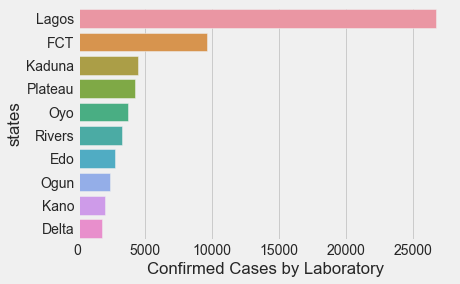

In [34]:
data = dfnig.nlargest(10, 'cases_lab_confirmed')
ax = sns.barplot(x='cases_lab_confirmed', y='states', data=data[['states', 'cases_lab_confirmed']])
ax.set_xlabel('Confirmed Cases by Laboratory')

Top 3 States - Lagos, Abuja and Kaduna

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

Text(0.5, 0, 'Discharged Cases')

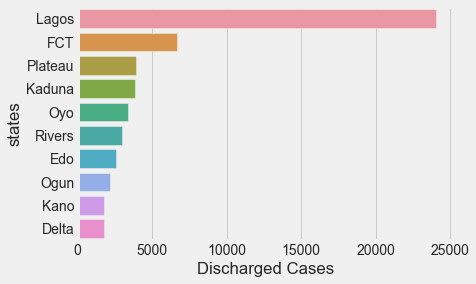

In [35]:
data = dfnig.nlargest(10, 'discharged')
ax = sns.barplot(x='discharged', y='states', data=data[['states', 'discharged']])
ax.set_xlabel('Discharged Cases')

Cases on admission represents the active cases in each states. Let's determine the states with high values of active cases.
<br>
TODO C: Plot the top 10 active cases

Text(0.5, 0, 'Top 10 Active Cases')

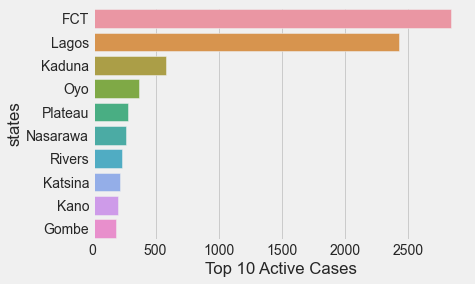

In [36]:
data = dfnig.nlargest(10, 'cases_on_admission')
ax = sns.barplot(x='cases_on_admission', y='states', data=data[['states', 'cases_on_admission']])
ax.set_xlabel('Top 10 Active Cases')

From the chart above, you will discover that FCT has the highest number of active cases, even though Lagos has the highest number of confirmed cases.

TODO D - Plot the top 10 Death cases

Text(0.5, 0, 'Top 10 Death Cases')

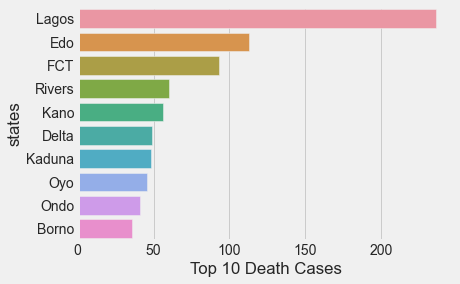

In [37]:
data = dfnig.nlargest(10, 'deaths')
ax = sns.barplot(x='deaths', y='states', data=data[['states', 'deaths']])
ax.set_xlabel('Top 10 Death Cases')

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

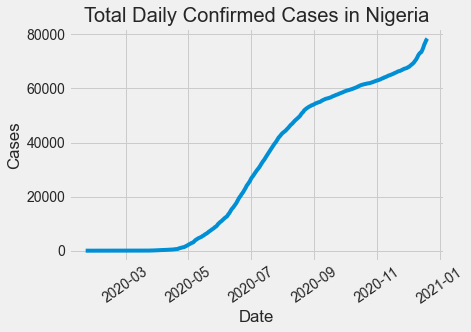

In [38]:
sns.lineplot(x="Date", y="Cases", data=confirmed_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Confirmed Cases in Nigeria')
plt.show()

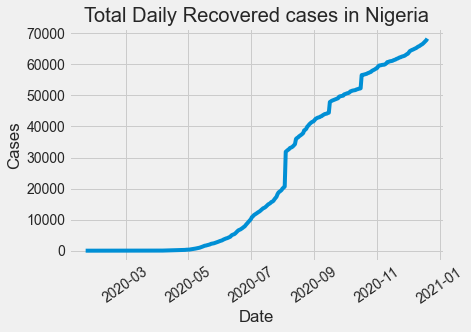

In [39]:
sns.lineplot(x="Date", y="Cases", data=recovered_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Recovered cases in Nigeria')
plt.show()

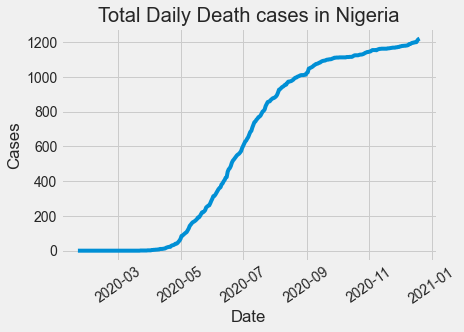

In [40]:
sns.lineplot(x="Date", y="Cases", data=deaths_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Death cases in Nigeria')
plt.show()

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

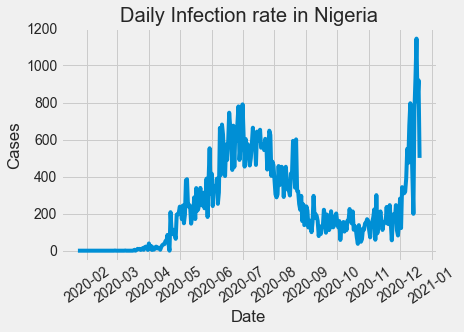

In [41]:
y = confirmed_nig['Cases'].diff()
sns.lineplot(x="Date", y=y, data=confirmed_nig)
plt.xticks(rotation=35)
plt.title('Daily Infection rate in Nigeria')
plt.show()

The maximum figure can be observed to be around December. It is really important that people continue keep to the preventive measures during this period.

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [42]:
y.max()

1145.0

In [43]:
confirmed_nig['IFR'] = confirmed_nig['Cases'].diff()
confirmed_nig.loc[confirmed_nig['IFR'] == y.max()]

,Date,Cases,IFR
330,2020-12-17,76207,1145.0


The maximum infection rate was recorded on 17th of December, 2020. Meaning there were 1145 new cases on that day. 
This result matches with the NCDC figures on their official Twitter account. 

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [44]:
df_join = pd.merge(dfnig, df_external, how='outer', on=['states'])

In [45]:
df_join.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708.0,2435.0,24037.0,236.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,9627.0,2840.0,6694.0,93.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,4504.0,579.0,3877.0,48.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,4262.0,280.0,3948.0,34.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Oyo,3788.0,368.0,3374.0,46.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06


In [46]:
df_tcases = df_join.nlargest(11, 'cases_lab_confirmed')


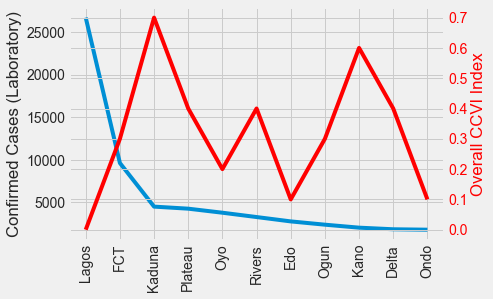

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_tcases['states'], df_tcases['cases_lab_confirmed'])
ax1.set_ylabel('Confirmed Cases (Laboratory)')
ax2 = ax1.twinx()
ax2.plot(df_tcases['states'], df_tcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

#### Write Your Observation Here
#### Observation
You will notice that the states with the highest vulnerability index score in relation to the confirmed cases are Northern states with weak health systems, more poverty etc. Lagos has a high number of confirmed cases but has less vulnerability index score because of good health system, more social distancing etc.  

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

<AxesSubplot:xlabel='Population Density', ylabel='cases_lab_confirmed'>

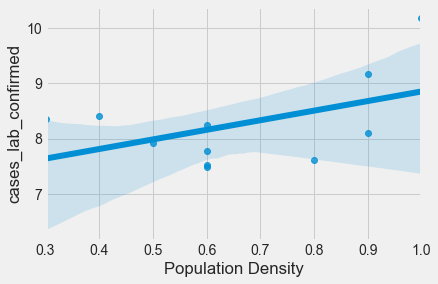

In [48]:
sns.regplot(df_tcases['Population Density'], np.log(df_tcases['cases_lab_confirmed']))

#### Observation
Confirmed cases and Population density have positive correlation. There are high cases in areas that are densely populated. 

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

### Impact on the Nigeria Economy 
<br>
### TODO K -Determine the effect of the Pandemic on the economy. A way to do this is to explore the initial and the revised budget (from budget data).
<br>
Steps
* Combine the budget data with your data on common column(states)
* Create a groupby object, by grouping by region and aggregating on Initial, Revised budget and confirmed cases. Sum is the aggregating function
* Determine the changes in budget(Initial - Revised)
* Check your groupby data or object, write down your observation. For example, what region has the highest reduction in budget and why is that?
* Generate a plot for your result. e.g barplot showing total reduction for each region. 

In [49]:
df_join2 = pd.merge(df_join, df_budget, how='outer', on=['states'])

In [50]:
df_join2.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn)
0,Lagos,26708.0,2435.0,24037.0,236.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,1680.00,920.5
1,FCT,9627.0,2840.0,6694.0,93.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,278.78,199.0
2,Kaduna,4504.0,579.0,3877.0,48.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,259.25,223.6
3,Plateau,4262.0,280.0,3948.0,34.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,177.30,122.0
4,Oyo,3788.0,368.0,3374.0,46.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06,213.00,174.0


In [51]:
dfgroup = df_join2.groupby('region')['Initial_budget (Bn)', 'Revised_budget (Bn)', 'cases_lab_confirmed'].sum()

In [52]:
dfgroup['changes'] = abs(dfgroup['Revised_budget (Bn)'] - dfgroup['Initial_budget (Bn)'])

In [53]:
dfgroup

,Initial_budget (Bn),Revised_budget (Bn),cases_lab_confirmed,changes
region,,,,
North Central,1136.08,760.00,16086.0,376.08
North East,951.13,720.01,3561.0,231.12
North West,1385.07,1078.50,8698.0,306.57
South East,640.86,470.20,3784.0,170.66
South South,1526.08,1026.45,9478.0,499.63
South West,2774.80,1699.20,36055.0,1075.60


From the table, the south west region recorded the highest amount of confirmed cases, and also the highest amount of reduction in budget. This is because, the south west region experienced the longest duration of Lock-down, and as such was forced to shut down major economic activities. The effect is seen in budget reduction. 

Text(0, 0.5, 'Region')

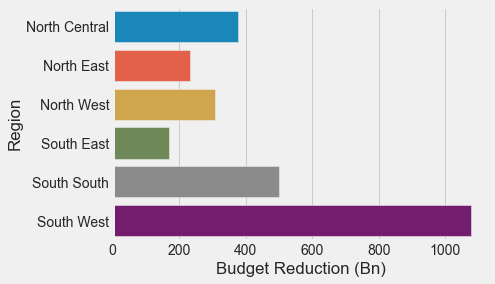

In [54]:
dfplot = dfgroup.reset_index()
y = dfplot['region']
ax = sns.barplot(x='changes', y=y, data=dfplot)
ax.set_xlabel('Budget Reduction (Bn)')
ax.set_ylabel('Region')

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

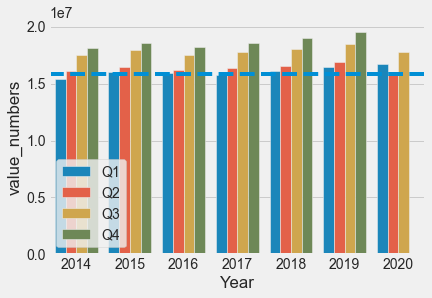

In [55]:
columns = ["Year", "Q1", "Q2", "Q3", "Q4"]
test_data_melted = pd.melt(df_readgdp, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",\
                data=test_data_melted)
plt.legend(loc='lower left')

g.axhline(1.589e7, ls='--')
plt.show()

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data